Exercise 1- Interpreting Loss Curves

Model A
Training loss and validation loss both decrease and converge at a low value.
Diagnosis:Good Fit

Reason:
The model generalizes well. Both losses decrease and stay close together.

Improvement:
No major change needed. Possibly train longer or slightly increase capacity.


Model B
Training loss becomes very low.
Validation loss decreases until epoch 40, then increases.

Diagnosis:Overfitting

Reason:
The model memorizes the training data after epoch 40.
Validation performance gets worse.

Improvement:
Add Dropout
Use Early Stopping
Reduce model complexity
Add L2 regularization



Model C
Both training and validation loss remain high and do not improve.

Diagnosis:Underfitting

Reason:
The model is too simple or cannot learn the pattern.

Improvement:
Increase model complexity
Train longer
Change architecture
Use better features

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

In [2]:
X, y = make_moons(n_samples=500, noise=0.3, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3]:
model_no_dropout = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

c:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [4]:
model_no_dropout.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [5]:
history1 = model_no_dropout.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    verbose=0
)

In [6]:
model_with_dropout = keras.models.Sequential([
    keras.layers.Dense(100, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation="sigmoid")
])

In [7]:
model_with_dropout.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

In [8]:
history2 = model_with_dropout.fit(
    X_train_scaled, y_train,
    epochs=100,
    validation_data=(X_test_scaled, y_test),
    verbose=0
)

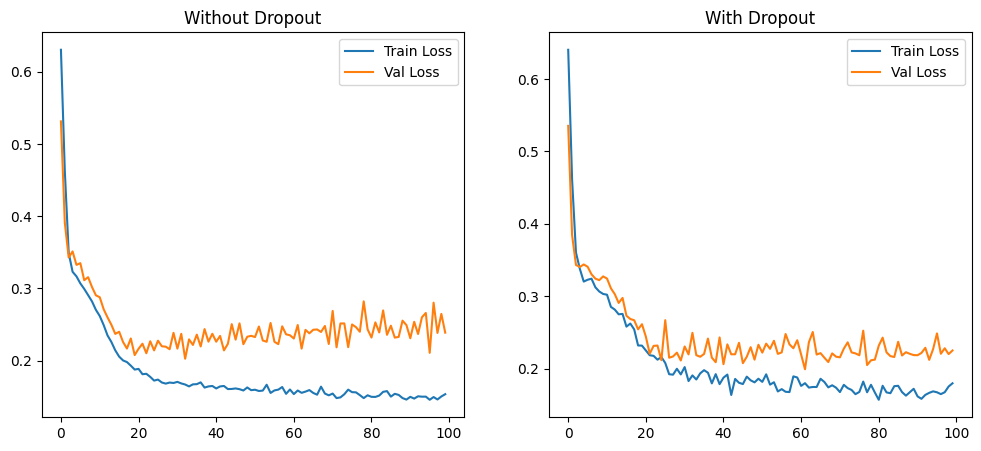

In [9]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history1.history['loss'], label='Train Loss')
plt.plot(history1.history['val_loss'], label='Val Loss')
plt.title('Without Dropout')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.title('With Dropout')
plt.legend()

plt.show()

Without Dropout:
The training loss becomes very low.
The validation loss starts increasing after some epochs.
This indicates overfitting.

With Dropout:
The gap between training and validation loss is smaller.
The validation loss is more stable.
The model generalizes better.

Conclusion:
Dropout reduces overfitting by preventing the network from relying too much on specific neurons.